In [211]:
# This is a simple simulation of a random walk in one dimension.
# The walker starts at position 0 and takes 100 steps.
# Each step is either +1 or -1 with equal probability.

import numpy as np
import matplotlib.pyplot as plt

def walk2():
    return np.random.choice([2, -2], p=[0.25, 0.75])
def walk1():
    return np.random.choice([1, 0])



In [247]:
class Agent:
    def __init__(self, gamma=0.9, epsilon=0.1, timeSteps=0, distance=0):
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_values = {1: 0, 2: 0}
        self.distance = distance
        self.timeSteps = timeSteps

    def choose_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.choice([1, 2])
        else:
            return 1 if self.q_values[1] > self.q_values[2] else 2

    def update_q_values(self, action, reward):
        self.q_values[action] = self.q_values[action] + (reward)
        self.distance += reward
        self.timeSteps += 1

# Instantiate the agent
agent = Agent(gamma=0.4)
n_steps = 1000
# Simulate the agent's actions and update Q-values
for step in range(n_steps):
    action = agent.choose_action()
    if action == 1:
        chosen_step = walk1()
    else:
        chosen_step = walk2()
    # print("Step:", step, "Action:", action, "Chosen step:", chosen_step, "Distance:", agent.distance, "Q-values:", agent.q_values)
    reward = chosen_step
    agent.update_q_values(action, reward)
print("Distance:", agent.distance)
print("Q-values:", agent.q_values)
# Determine if it's better to take walk1 or walk2
if agent.q_values[1] > agent.q_values[2]:
    print("It's better to take walk1.")
else:
    print("It's better to take walk2.")

Distance: 435
Q-values: {1: np.int64(493), 2: np.int64(-58)}
It's better to take walk1.


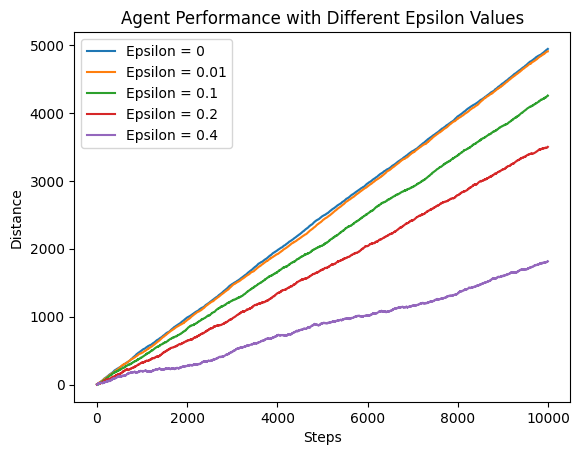

In [248]:
# Create agents with different epsilon values
epsilons = [0, 0.01, 0.1, 0.2, 0.4]
agents = [Agent(epsilon=eps) for eps in epsilons]
n_steps = 10000

# Initialize lists to store distances for each agent
distances = [[] for _ in range(len(agents))]

# Simulate the agents' actions and update Q-values
for i, agent in enumerate(agents):
    for step in range(n_steps):
        action = agent.choose_action()
        if action == 1:
            chosen_step = walk1()
        else:
            chosen_step = walk2()
        reward = chosen_step
        agent.update_q_values(action, reward)
        distances[i].append(agent.distance)

# Plot the results
for i, eps in enumerate(epsilons):
    plt.plot(distances[i], label=f'Epsilon = {eps}')

plt.xlabel('Steps')
plt.ylabel('Distance')
plt.title('Agent Performance with Different Epsilon Values')
plt.legend()
plt.show()

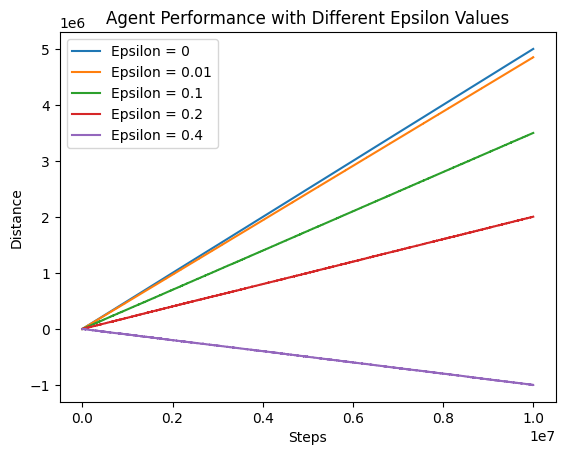

In [242]:
# Create agents with different epsilon values
epsilons = [0, 0.01, 0.1, 0.2, 0.4]
agents = [Agent(epsilon=eps) for eps in epsilons]
n_steps = 10000000

# Initialize lists to store distances for each agent
distances = [[] for _ in range(len(agents))]

# Simulate the agents' actions and update Q-values
for i, agent in enumerate(agents):
    for step in range(n_steps):
        action = agent.choose_action()
        if action == 1:
            chosen_step = walk1()
        else:
            chosen_step = walk2()
        reward = chosen_step
        agent.update_q_values(action, reward)
        distances[i].append(agent.distance)

# Plot the results
for i, eps in enumerate(epsilons):
    plt.plot(distances[i], label=f'Epsilon = {eps}')

plt.xlabel('Steps')
plt.ylabel('Distance')
plt.title('Agent Performance with Different Epsilon Values')
plt.legend()
plt.show()

In [253]:
alpha = 1
beta = 1

def isReject(affection):
    chanceOfRejection = 1- affection
    return np.random.choice([True, False], p=[chanceOfRejection, affection])

def goOnDate(attractive, affection):
    probRejecting = 1 - (alpha*attractive + beta*affection)/2
    if isReject(probRejecting):
        return 0.5
    else:
        return -0.5

def selfImprovement():
    return (np.random.rand()* 0.5)

def knowEachOther(attractive):
    epsilon = 0.05
    chanceOfRejection = 1 - attractive + epsilon
    if chanceOfRejection > np.random.rand():
        return 0
    return np.random.rand() * 0.5

class Man:
    def __init__(self, affection = 0, attractive = 0, gamma = 0.9, timeSteps = 0, state = {1: 0, 2:0}):
        self.affection = affection
        self.attractive = attractive
        self.gamma = gamma
        self.timesteps = timeSteps
        self.state = state
        self.epsilon = 0.1
        self.affectionChoses = 0
        self.attractiveChoses = 0
        self.qValue = {1: 0, 2: 0, 3: 0}
        
        # state for emotional being
        # * 1: RELATIONSHIP {Single, dating, in a relationship}
        self.relationState = 0.05
        # * 2: EMOTIONAL WELL BEING {Happy, Neutral, Sad}
        self.emotionalState = 0.05
    def chooseAction(self):
        combineProb = (self.affection + self.attractive)/2
        if np.random.rand() < self.epsilon + self.affection:
            return 4 # * confess
        else:
            if np.randdom.rand() < self.epsilon:
                return np.random.choice([1, 2, 3], p=[(1-self.epsilon)/2, (1-self.epsilon)/2, self.epsilon]) #* 1: self improvement, 2: know each other, 3: go on date
            else:
                if self.qValue[1] > self.qValue[2]:
                    return selfImprovement()
                elif (self.qValue[2]/2+self.qValue[1])/2 > self.qValue[3]:
                    return knowEachOther(self.attractive)
                else:
                    return goOnDate(self.attractive, self.affection)

    def stateTransition(self, action):
        # state for emotional being
        # * 1: RELATIONSHIP {Single, dating, in a relationship}
        # * 2: EMOTIONAL WELL BEING {Happy, Neutral, Sad}
        if action == 1:
            stateChoosen = np.random.choice([1, 2, 3], p=[0.5, 0.3, 0.2])
    def updateAffection(self):
        pass

In [252]:
age = 2001 - 1997
print(age)

4
